In [1]:
# !pip install -q tensorflow
# !pip install -q tensorflow-gpu

In [3]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [6]:
csvBTC = pd.read_csv('data/coin_Bitcoin.csv','r')
# csvBTC = pd.read_csv('coin_Bitcoin.csv','r')

csvBTC.head()

,"SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Ma",ketcap
0,"1,Bitcoin,BTC,2013-04-29 23:59:59,147.48800659...",NaN
1,"2,Bitcoin,BTC,2013-04-30 23:59:59,146.92999267...",NaN
2,"3,Bitcoin,BTC,2013-05-01 23:59:59,139.88999938...",NaN
3,"4,Bitcoin,BTC,2013-05-02 23:59:59,125.59999847...",NaN
4,"5,Bitcoin,BTC,2013-05-03 23:59:59,108.12799835...",NaN


In [7]:
print(csvBTC.shape)
csvBTC.columns

(2991, 2)


Index(['SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Ma', 'ketcap'], dtype='object')

In [8]:
csvBTC['SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Ma'][0].split(',')

['1',
 'Bitcoin',
 'BTC',
 '2013-04-29 23:59:59',
 '147.48800659179688',
 '134.0',
 '134.44400024414062',
 '144.5399932861328',
 '0.0',
 '1603768864.5']

In [9]:
dicBTC = {
    'SNo':[],
    'Name':[],
    'Symbol':[],
    'Date':[],
    'High':[],
    'Low':[],
    'Open':[],
    'Close':[],
    'Volume':[],
    'Ma':[]
}
for i in range(2991):
  raw = csvBTC['SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Ma'][i].split(',')
  dicBTC['SNo'].append(int(raw[0]))
  dicBTC['Name'].append(raw[1])
  dicBTC['Symbol'].append(raw[2])
  dicBTC['Date'].append(raw[3])
  dicBTC['High'].append(float(raw[4]))
  dicBTC['Low'].append(float(raw[5]))
  dicBTC['Open'].append(float(raw[6]))
  dicBTC['Close'].append(float(raw[7]))
  dicBTC['Volume'].append(float(raw[8]))
  dicBTC['Ma'].append(float(raw[9]))
print(dicBTC['Low'])

[134.0, 134.0500030517578, 107.72000122070312, 92.28189849853516, 79.0999984741211, 92.5, 107.14299774169922, 106.63999938964844, 97.69999694824219, 109.5999984741211, 109.26000213623047, 111.5510025024414, 113.01000213623047, 113.43499755859375, 114.5, 110.25, 103.5, 112.19999694824219, 116.57099914550781, 122.30000305175781, 119.57099914550781, 120.12000274658203, 121.20999908447266, 122.0, 123.0999984741211, 125.71900177001953, 128.89999389648438, 130.61500549316406, 124.69999694824219, 125.5999984741211, 127.66200256347656, 127.0, 126.4000015258789, 127.1989974975586, 115.05000305175781, 116.0, 119.0999984741211, 119.89900207519531, 117.25, 106.41999816894531, 107.30000305175781, 88.5, 95.00199890136719, 104.0, 106.73400115966797, 100.52999877929688, 98.0, 98.0, 98.94660186767578, 99.0, 101.03299713134766, 105.75499725341797, 107.5, 107.68499755859375, 107.51399993896484, 106.23400115966797, 100.9800033569336, 101.01000213623047, 102.79199981689453, 101.0999984741211, 92.3330001831

In [10]:
dicBTC.keys()

dict_keys(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Ma'])

In [12]:
dfBTC = pd.DataFrame(dicBTC,columns = ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Ma'])
dfBTC.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Ma
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [13]:
df = dfBTC
scaler = MinMaxScaler()
scale_cols = ['High', 'Low', 'Open', 'Close', 'Volume']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,High,Low,Open,Close,Volume
0,0.001126,0.001102,0.001039,0.001200,0.000000
1,0.001117,0.001103,0.001190,0.001112,0.000000
2,0.001008,0.000679,0.001111,0.000765,0.000000
3,0.000788,0.000431,0.000754,0.000580,0.000000
4,0.000518,0.000218,0.000595,0.000462,0.000000
5,0.000624,0.000434,0.000466,0.000695,0.000000
6,0.000683,0.000670,0.000700,0.000748,0.000000
7,0.000773,0.000662,0.000748,0.000692,0.000000
8,0.000600,0.000518,0.000689,0.000679,0.000000
9,0.000636,0.000709,0.000648,0.000712,0.000000


In [14]:
TEST_SIZE = 1000
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [15]:
feature_cols = ['High', 'Low', 'Open', 'Volume']
label_cols = ['Close']

train_feature = train[feature_cols].values
train_label = train[label_cols].values
train_feature = train_feature.reshape([*train_feature.shape, -1])

test_feature = test[feature_cols].values
test_label = test[label_cols].values
test_feature = test_feature.reshape([*test_feature.shape, -1])


# train, validation set
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)


print(x_train.shape, x_valid.shape)
# (1602, 13, 1) (401, 13, 1)

# # test dataset
# test_feature, test_label = make_dataset(test_feature, test_label, 20)
print(test_feature.shape, test_label.shape)
# (200, 13, 1), (200, 1)

(1592, 4, 1) (399, 4, 1)
(1000, 4, 1) (1000, 1)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [17]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=20)
filename = ('tmp_checkpoint1.h5')

# filename = os.path.join(model_path, 'tmp_checkpoint1.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=400, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Train on 1592 samples, validate on 399 samples
Epoch 1/400
1424/1592 [=========================>....] - ETA: 0s - loss: 0.0025
Epoch 00001: val_loss improved from inf to 0.00212, saving model to tmp_checkpoint1.h5
1592/1592 [==============================] - 2s 1ms/sample - loss: 0.0024 - val_loss: 0.0021
Epoch 2/400
1504/1592 [===========================>..] - ETA: 0s - loss: 0.0013
Epoch 00002: val_loss improved from 0.00212 to 0.00045, saving model to tmp_checkpoint1.h5
1592/1592 [==============================] - 1s 326us/sample - loss: 0.0012 - val_loss: 4.4541e-04
Epoch 3/400
1424/1592 [=========================>....] - ETA: 0s - loss: 1.0122e-04
Epoch 00003: val_loss improved from 0.00045 to 0.00001, saving model to tmp_checkpoint1.h5
1592/1592 [==============================] - 1s 335us/sample - loss: 9.1639e-05 - val_loss: 1.4612e-05
Epoch 4/400
1424/1592 [=========================>....] - ETA: 0s - loss: 1.5027e-05
Epoch 00004: val_loss did not improve from 0.00001
1592/1592 

1392/1592 [=========================>....] - ETA: 0s - loss: 6.3707e-06
Epoch 00033: val_loss did not improve from 0.00001
1592/1592 [==============================] - 0s 306us/sample - loss: 6.4844e-06 - val_loss: 8.5646e-06
Epoch 34/400
1408/1592 [=========================>....] - ETA: 0s - loss: 7.0465e-06
Epoch 00034: val_loss improved from 0.00001 to 0.00001, saving model to tmp_checkpoint1.h5
1592/1592 [==============================] - 0s 308us/sample - loss: 6.7708e-06 - val_loss: 5.1532e-06
Epoch 35/400
1456/1592 [==========================>...] - ETA: 0s - loss: 6.9546e-06
Epoch 00035: val_loss did not improve from 0.00001
1592/1592 [==============================] - 1s 324us/sample - loss: 6.6281e-06 - val_loss: 5.3966e-06
Epoch 36/400
1552/1592 [============================>.] - ETA: 0s - loss: 6.3177e-06
Epoch 00036: val_loss did not improve from 0.00001
1592/1592 [==============================] - 0s 313us/sample - loss: 6.3224e-06 - val_loss: 6.5783e-06
Epoch 37/400
1504

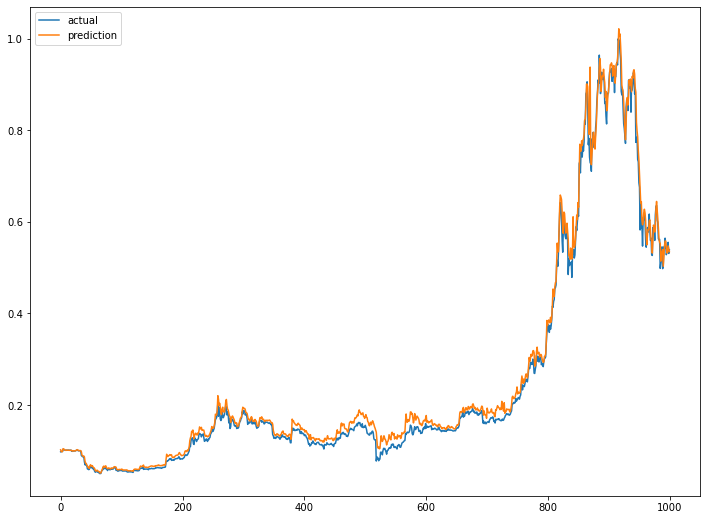

In [18]:
plt.figure(figsize=(12, 9))

pred = model.predict(test_feature)
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()